# Final Project: BITS F464 Machine Learning

Problem Statement as defined:

* Given a dataset, build a machine learning model for **binary classification.**
* Build a machine learning model to detect potential Higgs Boson
signal from one of the background processes that mimics it.
* Dataset Description:
The features present in this dataset are kinematic properties measured by the detectors and functions of these measured properties.
The dataset consists of a single binary target which indicates if a Higgs Boson signal is detected or not.


This project was done towards partial fulfillment of the requirements of the course:

**BITS F464: Machine Learning**

conducted in the First Semester, 2023-24 at BITS Pilani, K.K Birla Goa Campus.

## Downloading the dataset

First, I will download and unzip this dataset in order to preprocess it.

In [1]:
!wget https://storage.googleapis.com/bitsf464project/final_project.zip

--2023-11-22 17:09:29--  https://storage.googleapis.com/bitsf464project/final_project.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.212.207, 173.194.215.207, 173.194.216.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.212.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122567078 (117M) [application/zip]
Saving to: ‘final_project.zip’

final_project.zip   100%[===================>] 116.89M  20.2MB/s    in 7.0s    

2023-11-22 17:09:37 (16.7 MB/s) - ‘final_project.zip’ saved [122567078/122567078]



In [2]:
import zipfile

zip_ref = zipfile.ZipFile("final_project.zip", "r")
zip_ref.extractall()
zip_ref.close()

## Importing the Libraries

I will first import all libraries necessary for preprocessing and `sklearn` modules necessary for our model training and evaluation.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format='retina'

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

## Performing some EDA to better understand the dataset

In [4]:
train_data = pd.read_csv('train.csv')
train_data.head()

,Feat-1,Feat-2,Feat-3,Feat-4,Feat-5,Feat-6,Feat-7,Feat-8,Feat-9,Feat-10,...,Feat-22,Feat-23,Feat-24,Feat-25,Feat-26,Feat-27,Feat-28,Feat-29,Feat-30,Target
0,0.412963,0.577200,-0.953418,0.798840,0.658006,0.768405,-0.405588,-0.442541,-0.001558,1.049287,...,0.009059,0.646514,0.860895,-2.411875,0.994851,1.025006,0.579802,0.803897,0.904436,0.0
1,0.591946,1.210280,1.718345,3.053790,-1.179496,1.109550,0.775757,0.153515,-0.001558,0.555115,...,0.009059,1.478546,1.046527,0.503741,1.002365,0.842098,0.713030,0.777919,1.009964,0.0
2,1.907598,0.455454,-1.252488,0.215091,0.001179,0.489095,2.519551,0.292663,-0.001558,0.460814,...,3.111020,0.886526,0.740503,1.110159,0.998776,0.704871,0.493281,0.594564,0.580279,0.0
3,1.891311,-1.178866,1.035310,1.221389,1.481984,0.804590,1.561999,-0.699774,-0.001558,0.649795,...,3.111020,1.082386,0.928540,-0.060958,0.988557,0.699047,0.974086,1.213914,1.480364,0.0
4,1.550914,-0.886675,1.014226,0.666486,-0.244051,0.763458,-0.730383,-1.467584,2.171518,0.957251,...,0.009059,0.915975,0.941412,0.527787,1.308168,1.022230,0.592647,0.897614,0.927630,0.0


Looks like we have 30 features and a binary target to predict.

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 31 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Feat-1   400000 non-null  float64
 1   Feat-2   400000 non-null  float64
 2   Feat-3   400000 non-null  float64
 3   Feat-4   400000 non-null  float64
 4   Feat-5   400000 non-null  float64
 5   Feat-6   400000 non-null  float64
 6   Feat-7   400000 non-null  float64
 7   Feat-8   400000 non-null  float64
 8   Feat-9   400000 non-null  float64
 9   Feat-10  400000 non-null  float64
 10  Feat-11  400000 non-null  float64
 11  Feat-12  400000 non-null  float64
 12  Feat-13  400000 non-null  float64
 13  Feat-14  400000 non-null  float64
 14  Feat-15  400000 non-null  float64
 15  Feat-16  400000 non-null  float64
 16  Feat-17  400000 non-null  float64
 17  Feat-18  400000 non-null  float64
 18  Feat-19  400000 non-null  float64
 19  Feat-20  400000 non-null  float64
 20  Feat-21  400000 non-null  

There is no missing data in any of the features, which is a good sign.

Let us take a look at some statistics of these 30 features.

In [6]:
train_data.describe()

,Feat-1,Feat-2,Feat-3,Feat-4,Feat-5,Feat-6,Feat-7,Feat-8,Feat-9,Feat-10,...,Feat-22,Feat-23,Feat-24,Feat-25,Feat-26,Feat-27,Feat-28,Feat-29,Feat-30,Target
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,...,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,0.982843,-0.001561,-0.001017,0.984703,0.009894,0.990885,0.007212,-0.003996,0.999195,0.996191,...,1.007060,1.046644,1.026883,-0.003557,1.061228,1.014461,0.975015,1.042737,0.959163,0.529565
std,0.565193,1.008540,1.005795,0.599097,1.007104,0.475918,1.010436,1.006052,1.028296,0.501944,...,1.399359,0.668905,0.377700,1.002943,0.164520,0.397562,0.525233,0.364470,0.313235,0.499126
min,0.265458,-2.437234,-1.741876,-0.012135,-1.732265,0.139338,-2.961371,-1.745881,-0.001558,0.191758,...,0.009059,0.119240,0.267894,-5.190888,0.102700,0.276120,0.049801,0.312996,0.350306,0.000000
25%,0.581698,-0.738632,-0.872408,0.564164,-0.861432,0.679180,-0.678891,-0.871076,-0.001558,0.659741,...,0.009059,0.803138,0.848618,-0.684386,0.996262,0.772243,0.675407,0.829239,0.769600,0.000000
50%,0.845048,-0.002312,-0.000164,0.877646,0.008527,0.894823,0.007338,-0.005139,1.084980,0.893040,...,0.009059,0.907138,0.952782,-0.002799,1.000266,0.921431,0.875206,0.956965,0.870825,1.000000
75%,1.229367,0.737905,0.869407,1.278462,0.884040,1.170194,0.693567,0.864224,2.171518,1.203896,...,3.111020,1.036581,1.085500,0.672386,1.031065,1.146958,1.141610,1.149688,1.058715,1.000000
max,8.702543,2.432610,1.743868,9.888168,1.754930,8.383347,2.978028,1.736811,2.171518,11.649858,...,3.111020,20.949146,10.476530,4.835169,5.931732,10.473130,13.737367,8.442006,6.015014,1.000000


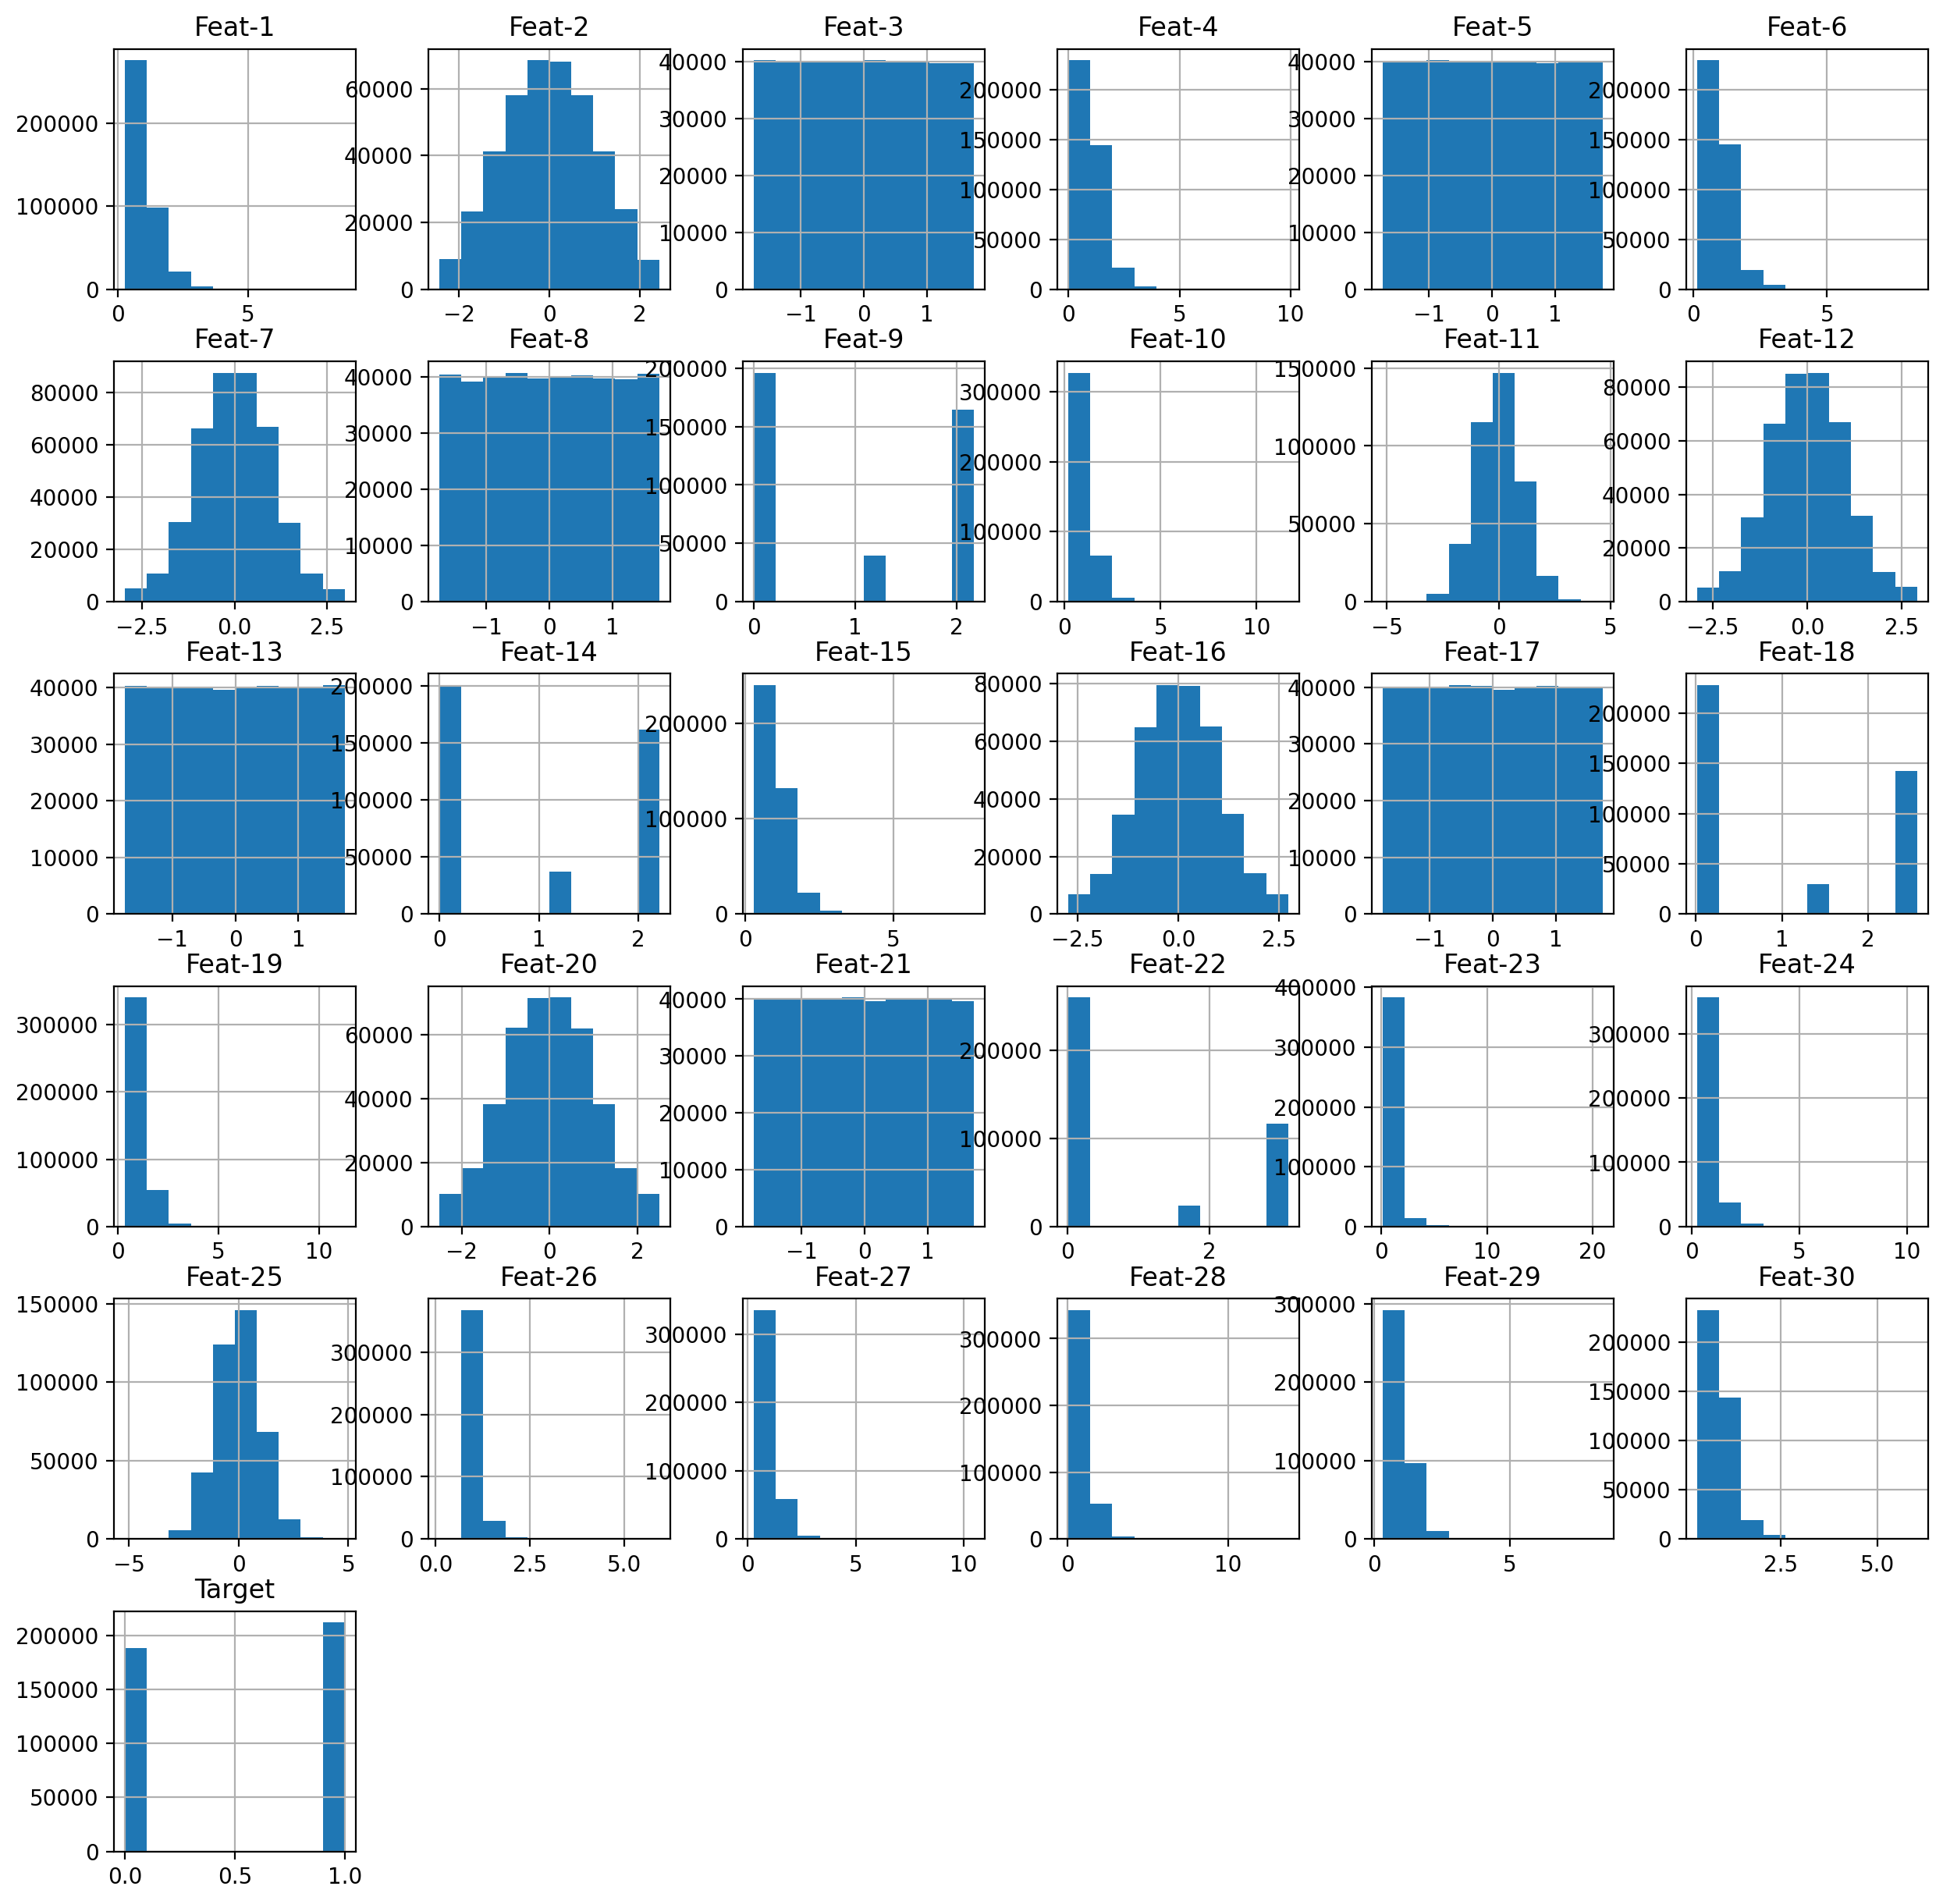

In [7]:
# Plotting histograms of each feature
train_data.hist(figsize = (15,15))
plt.show()

We can see that the values in the `mean` column somewhat vary across features, and their standard deviations vary from approximately -0.01 to 1.4.

This indicates that the feature vector might need some feature engineering and transformation before feeding it to our classification model.

Let us create a correlation heatmap to visualise correlations between different variables and thus help predict relationships between different features.

In [8]:
train_copy = train_data.copy()

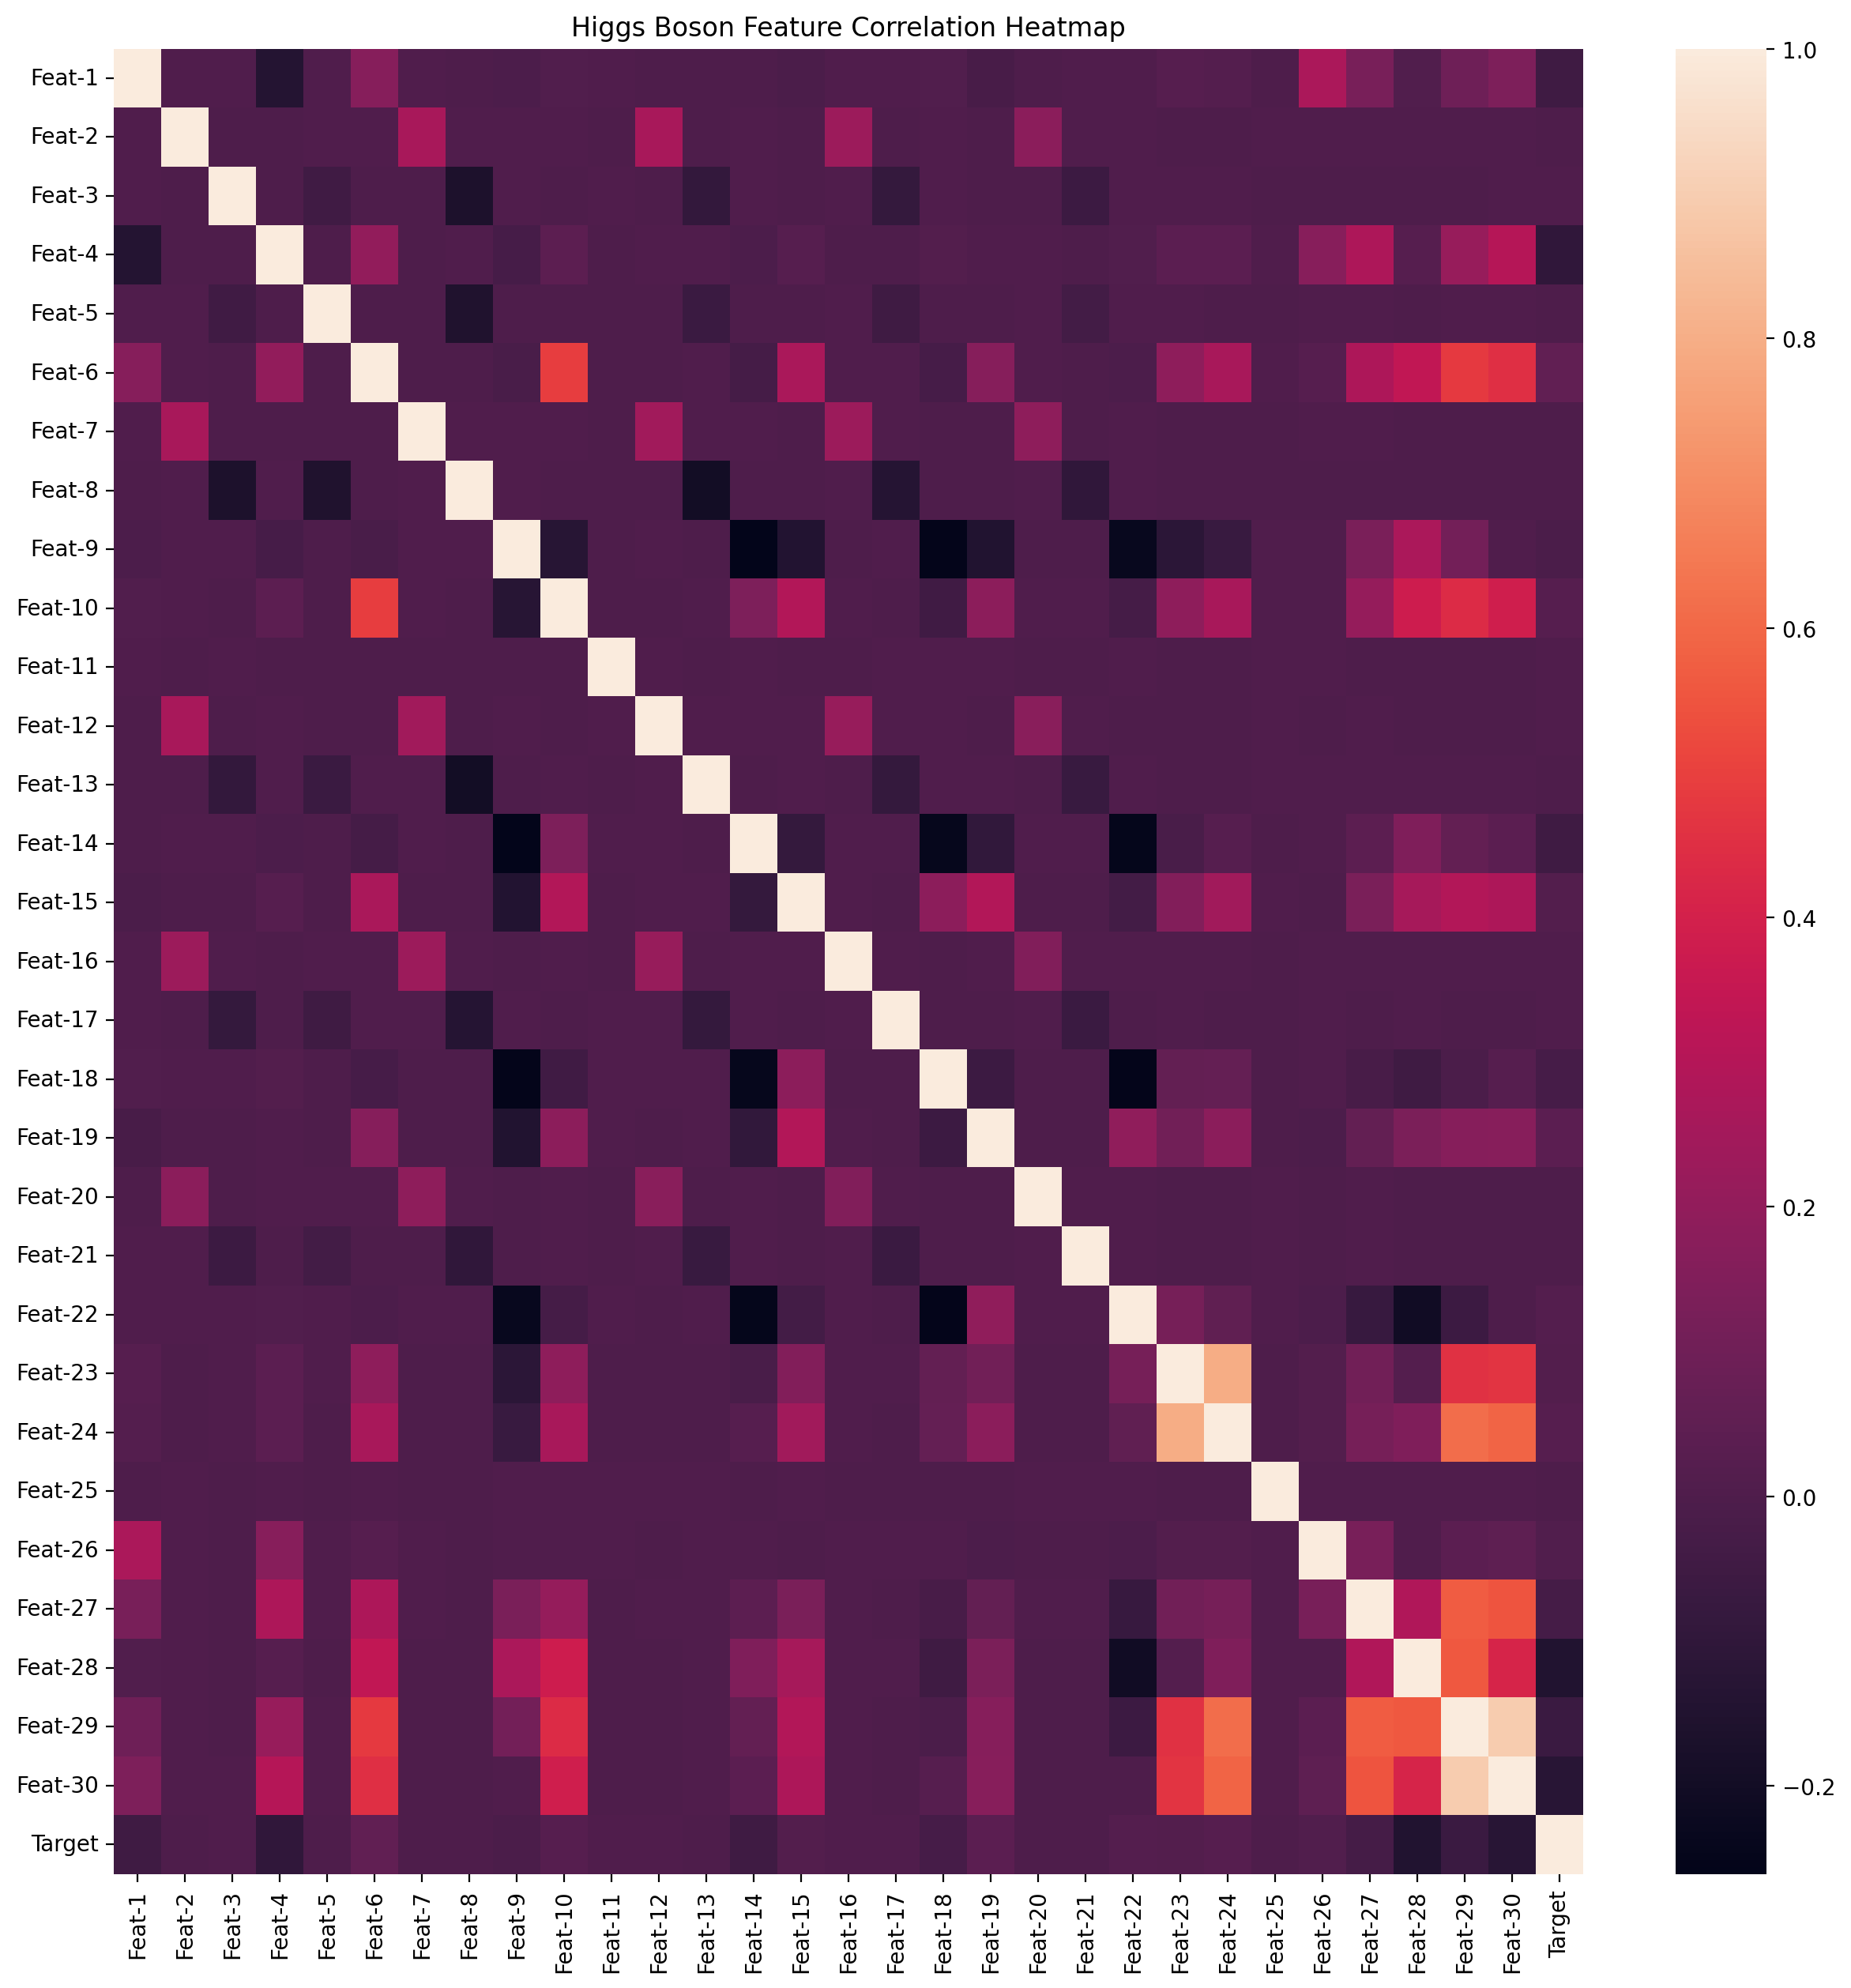

In [9]:
plt.figure(figsize = (15,15));
sns.heatmap(train_copy.corr(), cmap = 'rocket', annot = False);
plt.title("Higgs Boson Feature Correlation Heatmap");

In [10]:
X_train = train_data.drop(['Target'], axis = 1)
y_train = train_data['Target']

In [11]:
test_data = pd.read_csv('test.csv')

In [12]:
X_test = test_data.drop(['ID'], axis = 1)

## Working out the best classification model for the job

Now that I have created the feature vectors and target variables, I have to find out the best model for the job.

To do this, we can use the [LazyPredict](https://pypi.org/project/lazypredict/) library.

*Lazy Predict helps build a lot of basic models without much code and helps understand which models works better without any parameter tuning.*

So, I will feed a sample of our training and test data to a LazyPredict Classifier to train about 25+ different classification models and then choose one of the best performing models based on evaluation metrics like Accuracy, Balanced Accuracy, ROC AUC and F1 Score.

In [13]:
#Extracting a sample of the dataset to feed to the LazyPredict Classifier
X_cropped = X_train[0:10000]
y_cropped = y_train[0:10000]

In [14]:
#Splitting the dataset into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_cropped, y_cropped, test_size = 0.2, random_state = 42)

In [15]:
#Feature Scaling using MinMax() scaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [16]:
!pip install lazypredict

In [17]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [18]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models_train, predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_val, predictions_val = clf.fit(X_train, X_val, y_train, y_val)

 97%|█████████▋| 28/29 [01:17<00:02,  2.32s/it]

[LightGBM] [Info] Number of positive: 4245, number of negative: 3755
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6646
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530625 -> initscore=0.122654
[LightGBM] [Info] Start training from score 0.122654


100%|██████████| 29/29 [01:17<00:00,  2.68s/it]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 97%|█████████▋| 28/29 [00:48<00:01,  1.80s/it]

[LightGBM] [Info] Number of positive: 4245, number of negative: 3755
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6646
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530625 -> initscore=0.122654
[LightGBM] [Info] Start training from score 0.122654


100%|██████████| 29/29 [00:48<00:00,  1.69s/it]


In [19]:
models_val

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.71,0.70,0.70,0.71,0.63
RandomForestClassifier,0.70,0.69,0.69,0.70,5.58
XGBClassifier,0.70,0.69,0.69,0.70,1.44
BaggingClassifier,0.67,0.67,0.67,0.67,2.30
SVC,0.66,0.65,0.65,0.66,6.82
AdaBoostClassifier,0.66,0.65,0.65,0.65,1.78
ExtraTreesClassifier,0.65,0.65,0.65,0.65,1.47
NuSVC,0.65,0.65,0.65,0.65,9.39
QuadraticDiscriminantAnalysis,0.65,0.64,0.64,0.64,0.05


The `LGBMClassifier` and `RandomForestClassifier` performed the best with the validation data.

Let us train both these models.

In [20]:
X_test = sc.transform(X_test)

## Training a base *Random Forest Classifier* model on the Higgs Boson Training Dataset

In [21]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100, criterion = "entropy", n_jobs = -1,
                                    verbose = 0, random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=42)

## Evaluating the *Random Forest Classifier* model on some classification metrics

In [22]:
def report(classifier, X, y):
  cv = StratifiedKFold(n_splits=5, shuffle=True)
  accuracy_scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv)
  f1_scores = cross_val_score(classifier, X, y, scoring='f1', cv=cv)
  avg_precision_scores = cross_val_score(classifier, X, y, scoring='average_precision', cv=cv)
  log_loss = cross_val_score(classifier, X, y, scoring = 'neg_log_loss', cv = cv)
  print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f}")
  print(f"Mean F1 Score: {np.mean(f1_scores):.4f}")
  print(f"Mean Precision Score: {np.mean(avg_precision_scores):.4f}")
  print(f"Mean Log Loss: {np.mean(log_loss):.4f}")

In [23]:
report(classifier, X_val, y_val)

Mean Accuracy: 0.6705
Mean F1 Score: 0.7021
Mean Precision Score: 0.7687
Mean Log Loss: -0.6101


**This version of a base `RandomForestClassifier` achieved an accuracy score of 0.7283 on submission.**

## Training a base `LGBMClassifier` model on the Higgs Boson Training Dataset

In [25]:
from lightgbm import LGBMClassifier

lgbm_classifier = LGBMClassifier(random_state=42, n_jobs = -1)

lgbm_classifier.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 4245, number of negative: 3755
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002866 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6642
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530625 -> initscore=0.122654
[LightGBM] [Info] Start training from score 0.122654


LGBMClassifier(n_jobs=-1, random_state=42)

In [ ]:
report(lgbm_classifier, X_val, y_val)

The `report()` function returned:

* Mean Accuracy: 0.6655
* Mean F1 Score: 0.6907
* Mean Precision Score: 0.7592
* Mean Log Loss: -0.6336

**This base version of the `LGBMClassifier` achieved an accuracy score of 0.72343 on submission.**

## Hyperparameter Tuning

In five of my previous submissions for this project, the `RandomForestClassifier` returned the best accuracy of 72.83%. The `LGBMClassifier` was a close second with 72.343%.

Let's work on the `RandomForestClassifier` and further tune its hyperparameters to their optimal values.

In [ ]:
# Execution Time: Approx 17 minutes
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter distributions
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'max_features': [None, "sqrt", "log2"]
}

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV
randomized_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=5, cv=5, scoring='accuracy', random_state=42)
randomized_search.fit(X_train[0:25000], y_train[0:25000])

# Get the best hyperparameters
best_params = randomized_search.best_params_
'''

In [28]:
#best_params

## Training an optimized `RandomForestClassifier` on the Higgs Boson training dataset


In [ ]:
# Execution Time: Approx 9 minutes
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter distributions
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20)
}

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV
randomized_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=5, cv=5, scoring='accuracy', random_state=42)
randomized_search.fit(X_train[0:25000], y_train[0:25000])

# Get the best hyperparameters
best_params = randomized_search.best_params_
'''

In [30]:
#best_params

In [31]:
classifier = RandomForestClassifier(n_estimators = 156, max_depth = 20,
                                    max_features = 'log2', min_samples_split = 16,
                                    n_jobs = -1, verbose = 0, random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features='log2', min_samples_split=16,
                       n_estimators=156, n_jobs=-1, random_state=42)

In [32]:
report(classifier, X_val, y_val)

Mean Accuracy: 0.6640
Mean F1 Score: 0.6980
Mean Precision Score: 0.7664
Mean Log Loss: -0.6144


**This model achieved an accuracy score of 0.72531 on submission.**

## Training an optimized `LGBMClassifier` on the Higgs Boson Training Dataset

Let's try and optimise the `LGBMClassifier` Model which achieved an accuracy score of 0.72343.

This time, I will tune the model on the entire training dataset, with double the number of iterations, and find out the optimal hyperparameters.

In [ ]:
# Execution Time: Approx 19 minutes
'''
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the hyperparameter distributions
param_dist = {
    'boosting_type': ['gbdt', 'dart', 'rf'],
    'num_leaves': randint(10,100),
    'max_depth': randint(-1, 20),
    'learning_rate': uniform(1e-4, 1e-1),
    'n_estimators': randint(50, 200)
}

# Create the Random Forest classifier
lgbm_classifier = LGBMClassifier(random_state=42, n_jobs = -1)

# Perform RandomizedSearchCV
randomized_search = RandomizedSearchCV(lgbm_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
randomized_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = randomized_search.best_params_

best_params
'''

In [34]:
lgbm_classifier = LGBMClassifier(boosting_type = 'gbdt', learning_rate = 0.059785015794648705,
                                 max_depth = 17, n_estimators = 124, num_leaves = 84,
                                 random_state=42, n_jobs = -1)

lgbm_classifier.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 4245, number of negative: 3755
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6642
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530625 -> initscore=0.122654
[LightGBM] [Info] Start training from score 0.122654
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(learning_rate=0.059785015794648705, max_depth=17,
               n_estimators=124, n_jobs=-1, num_leaves=84, random_state=42)

In [35]:
y_pred = lgbm_classifier.predict(X_test)

In [ ]:
report(lgbm_classifier, X_val, y_val)

The `report()` function returned:

* Mean Accuracy: 0.6600
* Mean F1 Score: 0.6851
* Mean Precision Score: 0.7645
* Mean Log Loss: -0.6587

**This optimized version of the `LGBMClassifier` achieved an accuracy score of 0.73351 on submission.**

## Submission Cells

In [37]:
submission_df = pd.DataFrame(test_data['ID'])
submission_df['Target'] = y_pred.astype(int)

In [38]:
submission_df.to_csv('lgbm_optimized.csv', index = False)